## Task 3_1_1(fill the missing data with average)

In [1]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [2]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_31020/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_31020/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot'][i

In [3]:
#Fill the missing data with average
all_data=all_data.fillna(all_data['pm2.5'].mean())

In [4]:
#用lof算法分别识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [5]:
#splitting data to X and y & do log to y
from scipy import stats
all_data_X=all_data[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot']]
all_data_y=all_data[['year','month','day','pm2.5']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

C:\Users\lzh\AppData\Local\Temp/ipykernel_31020/3396474041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_y['pm2.5']=np.log(all_data['pm2.5'])


In [6]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task3_1_1_X=copy.deepcopy(all_data_X)
test_data_task3_1_1_X=copy.deepcopy(all_data_X)
train_data_task3_1_1_y=copy.deepcopy(all_data_y)
test_data_task3_1_1_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3:
      train_data_task3_1_1_X.drop(index=i,inplace=True)
      train_data_task3_1_1_y.drop(index=i,inplace=True)
   else:
      test_data_task3_1_1_X.drop(index=i,inplace=True)
      test_data_task3_1_1_y.drop(index=i,inplace=True)

In [7]:
#Do the OLS regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
lm.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),lm.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

(0.4474176874117457, 0.447694557958876)

Text(0, 0.5, 'frequency')

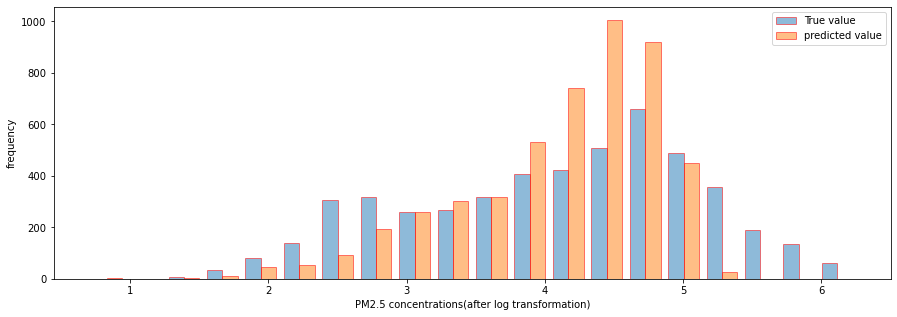

In [8]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_1_y['pm2.5'],lm.predict(test_data_task3_1_1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [9]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
lr.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),lr.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

(0.44741768608481947, 0.44769413651527035)

In [10]:
#Ridge with CV
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-10,10,200)  
lr_cv=RidgeCV(alphas=alphas).fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])  
lr=Ridge(lr_cv.alpha_)
lr.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
lr.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),lr.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

(0.4474172579692066, 0.4476865764305409)

Text(0, 0.5, 'frequency')

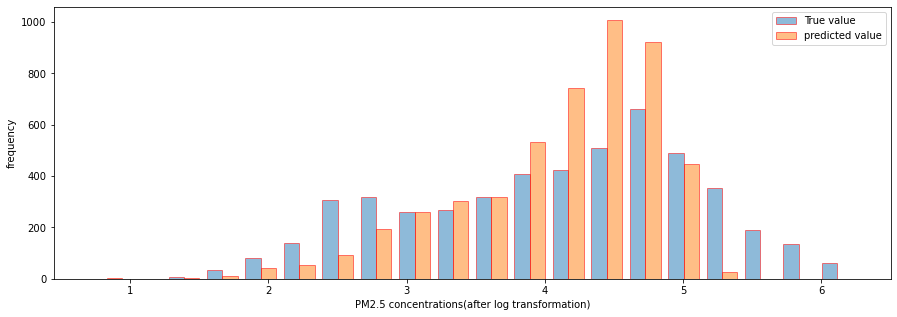

In [11]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_1_y['pm2.5'],lr.predict(test_data_task3_1_1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [12]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
la.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),la.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

(0.296907315921386, 0.3127935073523017)

In [13]:
#LASSO with CV
from sklearn.linear_model import LassoCV
alphas=np.logspace(-10,10,200)  
la_cv=LassoCV(alphas=alphas).fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])  
la=Lasso(la_cv.alpha_)
la.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
la.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),la.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

(0.447384191594277, 0.4478134104671877)

Text(0, 0.5, 'frequency')

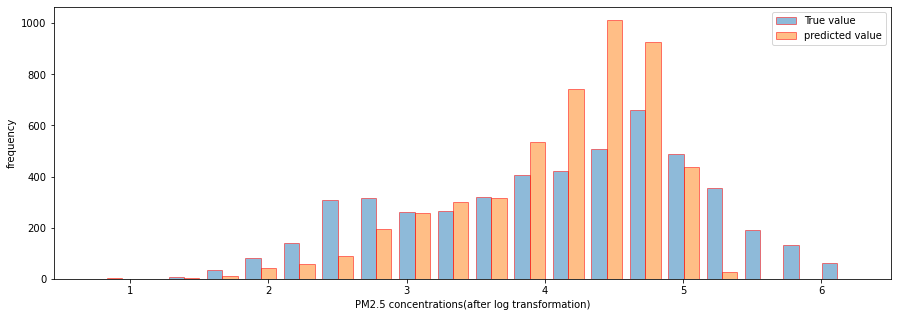

In [14]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_1_y['pm2.5'],la.predict(test_data_task3_1_1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [15]:
from xgboost import XGBRegressor
from sklearn import preprocessing
from hyperopt import hp, fmin, rand, tpe, space_eval
lbl = preprocessing.LabelEncoder()
train_data_task3_1_1_X['cvornot'] = lbl.fit_transform(train_data_task3_1_1_X['cvornot'].astype(str))
train_data_task3_1_1_X['NEornot'] = lbl.fit_transform(train_data_task3_1_1_X['NEornot'].astype(str))
train_data_task3_1_1_X['NWornot'] = lbl.fit_transform(train_data_task3_1_1_X['NWornot'].astype(str))
train_data_task3_1_1_X['SEornot'] = lbl.fit_transform(train_data_task3_1_1_X['SEornot'].astype(str))
test_data_task3_1_1_X['cvornot'] = lbl.fit_transform(test_data_task3_1_1_X['cvornot'].astype(str))
test_data_task3_1_1_X['NEornot'] = lbl.fit_transform(test_data_task3_1_1_X['NEornot'].astype(str))
test_data_task3_1_1_X['NWornot'] = lbl.fit_transform(test_data_task3_1_1_X['NWornot'].astype(str))
test_data_task3_1_1_X['SEornot'] = lbl.fit_transform(test_data_task3_1_1_X['SEornot'].astype(str))


space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    xgb=XGBRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    xgb.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
    return -1*xgb.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

xgb=XGBRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
xgb.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
xgb.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),xgb.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

100%|██████████| 100/100 [02:31<00:00,  1.52s/trial, best loss: -0.5732824986130107]


(0.6039168100914913, 0.5732824986130107)

Text(0, 0.5, 'frequency')

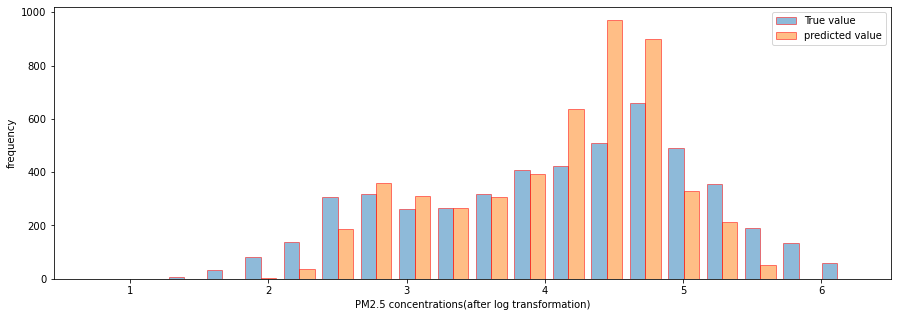

In [16]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_1_y['pm2.5'],xgb.predict(test_data_task3_1_1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [17]:
#梯度boosting算法(含优化函数调参)
from hyperopt import hp, fmin, rand, tpe, space_eval
from sklearn.ensemble import GradientBoostingRegressor
space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    gbr=GradientBoostingRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    gbr.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
    return -1*gbr.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

gbr=GradientBoostingRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
gbr.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
gbr.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),gbr.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

100%|██████████| 100/100 [12:46<00:00,  7.67s/trial, best loss: -0.5734688895199345]


(0.6075296131887689, 0.573321206676253)

Text(0, 0.5, 'frequency')

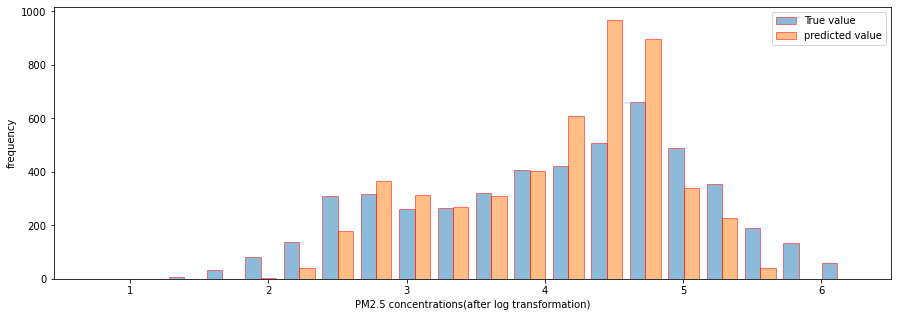

In [18]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_1_y['pm2.5'],gbr.predict(test_data_task3_1_1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [8]:
#catboost
from catboost import CatBoostRegressor
# score=pd.DataFrame(columns=['learning_rate','score'])
# for i in range(-10,11):
#     ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
#     ctr.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
#     new=pd.DataFrame({'learning_rate':0.03982+i*0.0001/20,'score':ctr.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])},index=[1])
#     score=score.append(new,ignore_index=True)

In [20]:
score

,learning_rate,score
0,0.039770,0.577149
1,0.039775,0.577810
2,0.039780,0.576930
3,0.039785,0.576788
4,0.039790,0.576242
5,0.039795,0.576588
6,0.039800,0.577135
7,0.039805,0.576785
8,0.039810,0.576615
9,0.039815,0.576551


In [9]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.039775)
ctr.fit(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5'])
ctr.score(train_data_task3_1_1_X,train_data_task3_1_1_y['pm2.5']),ctr.score(test_data_task3_1_1_X,test_data_task3_1_1_y['pm2.5'])

0:	learn: 0.9823493	total: 145ms	remaining: 3m 37s
1:	learn: 0.9676459	total: 149ms	remaining: 1m 51s
2:	learn: 0.9531049	total: 153ms	remaining: 1m 16s
3:	learn: 0.9397237	total: 157ms	remaining: 58.8s
4:	learn: 0.9271300	total: 162ms	remaining: 48.3s
5:	learn: 0.9151018	total: 166ms	remaining: 41.3s
6:	learn: 0.9038286	total: 170ms	remaining: 36.2s
7:	learn: 0.8935678	total: 174ms	remaining: 32.4s
8:	learn: 0.8836277	total: 178ms	remaining: 29.5s
9:	learn: 0.8746459	total: 182ms	remaining: 27.1s
10:	learn: 0.8658711	total: 186ms	remaining: 25.2s
11:	learn: 0.8570983	total: 191ms	remaining: 23.7s
12:	learn: 0.8493136	total: 195ms	remaining: 22.3s
13:	learn: 0.8416772	total: 199ms	remaining: 21.1s
14:	learn: 0.8345355	total: 202ms	remaining: 20s
15:	learn: 0.8274829	total: 206ms	remaining: 19.1s
16:	learn: 0.8218995	total: 210ms	remaining: 18.3s
17:	learn: 0.8163149	total: 213ms	remaining: 17.5s
18:	learn: 0.8109906	total: 217ms	remaining: 16.9s
19:	learn: 0.8055412	total: 220ms	remain

(0.6287170629381031, 0.5778102983791574)

Text(0, 0.5, 'frequency')

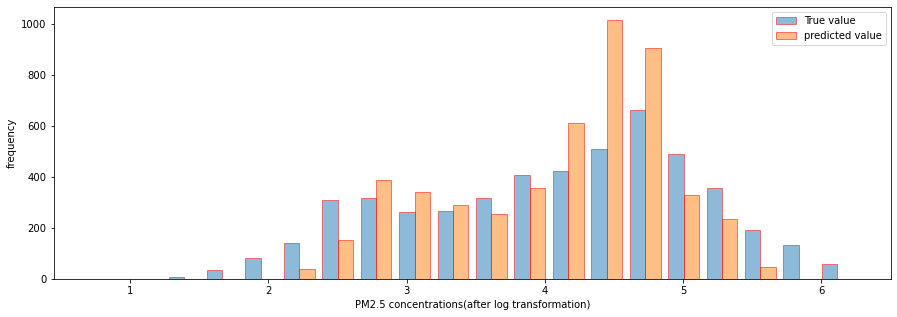

In [22]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_1_y['pm2.5'],ctr.predict(test_data_task3_1_1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [10]:
ctr.feature_names_

['DEWP',
 'TEMP',
 'PRES',
 'Iws',
 'Is',
 'Ir',
 'cvornot',
 'NEornot',
 'NWornot',
 'SEornot']

In [11]:
ctr.feature_importances_

array([28.44405371, 25.11304854,  8.16486768, 22.24751982,  0.05997489,
        0.40813089,  0.7038741 ,  1.53400864,  3.157911  , 10.16661074])

Text(0, 0.5, 'Importance')

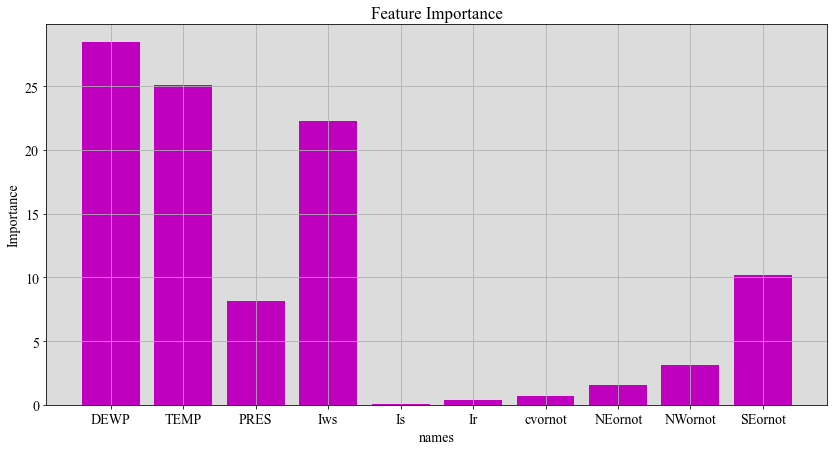

In [16]:
from matplotlib import pyplot as plt
plt.rc('figure', figsize = (14, 7))
plt.rc('font',size = 14)
plt.rc('font',family='Times New Roman')
plt.rc('axes', grid = True)
plt.rc('axes', facecolor = 'gainsboro')
plt.bar(ctr.feature_names_,ctr.feature_importances_,color='m')

plt.title('Feature Importance')
plt.xlabel("names")
plt.ylabel('Importance')